In [1]:
import torch

# weights
w = torch.tensor(20.0, requires_grad=True)
b = torch.tensor(-20.0, requires_grad=True)

# independent variable
x = torch.arange(-3, 3, .1).view(-1, 1)

# dependent variable
y = 3*x+5 

# add noise
y_n = y + torch.randn(x.size())

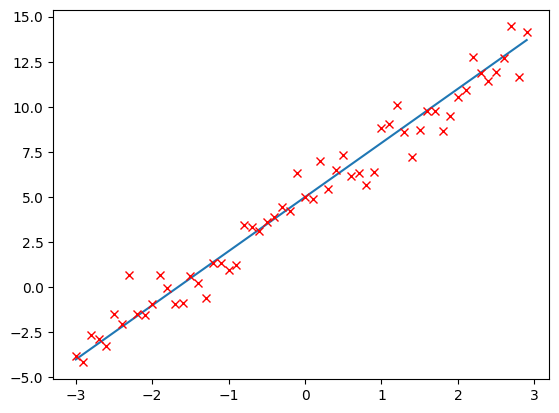

In [2]:
import matplotlib.pyplot as plt

plt.plot(x.numpy(), y.numpy())
plt.plot(x.numpy(), y_n.numpy(), 'rx')
plt.show();

In [3]:
# define forward function
def forward(x, w, b):
    return w*x+b

# define loss function
def loss_fn(y_hat, y_obs):
    return torch.mean((y_hat-y_obs)**2)

In [4]:
# learning rate 
lr = .1
prev_loss = 1e10

for epoch in range(100):
    y_hat = forward(x, w, b)
    loss = loss_fn(y_hat, y_n)
    if abs(loss-prev_loss)<0.01:
        break
   
    print(f"epoch: {epoch} loss: {loss} weight: {w.data:.2f} intercept: {b.data:.2f}")
    
    # update weights
    loss.backward()
    w.data -= lr*w.grad.data 
    b.data -= lr*b.grad.data
    
    # make grad zero for next iteration 
    # (prev value is used for grad computation) 
    w.grad.data.zero_()
    b.grad.data.zero_()
    
    prev_loss = loss
    
  
print(f"Minimum attainable loss: {loss_fn(y, y_n)}")  
print(f"correct slope: 3 intercept: 5")
print(f"obtained slope: {w.data} intercept: {b.data}")

    

epoch: 0 loss: 1542.2930908203125 weight: 20.00 intercept: -20.00
epoch: 1 loss: 534.615478515625 weight: 9.48 intercept: -14.85
epoch: 2 loss: 270.3349609375 weight: 5.33 intercept: -10.83
epoch: 3 loss: 161.87796020507812 weight: 3.71 intercept: -7.65
epoch: 4 loss: 102.11994171142578 weight: 3.10 intercept: -5.13
epoch: 5 loss: 65.39804077148438 weight: 2.88 intercept: -3.12
epoch: 6 loss: 42.128177642822266 weight: 2.81 intercept: -1.51
epoch: 7 loss: 27.26554298400879 weight: 2.80 intercept: -0.23
epoch: 8 loss: 17.753807067871094 weight: 2.81 intercept: 0.80
epoch: 9 loss: 11.663496017456055 weight: 2.82 intercept: 1.62
epoch: 10 loss: 7.763423442840576 weight: 2.83 intercept: 2.28
epoch: 11 loss: 5.26584529876709 weight: 2.85 intercept: 2.81
epoch: 12 loss: 3.666402578353882 weight: 2.86 intercept: 3.23
epoch: 13 loss: 2.6421210765838623 weight: 2.86 intercept: 3.57
epoch: 14 loss: 1.9861708879470825 weight: 2.87 intercept: 3.84
epoch: 15 loss: 1.5661011934280396 weight: 2.88 in

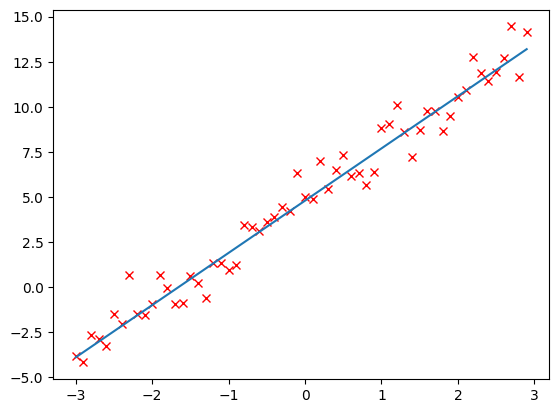

In [5]:
plt.plot(x, y_n, 'rx')
plt.plot(x, y_hat.data)

plt.show();